<a href="https://colab.research.google.com/github/dhanamperumalsamy/dhanamperumalsamy/blob/main/breast_cancer_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qiskit qiskit-machine-learning pylatexenc



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 65.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 60.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.1/125.1 kB 10.6 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=b6b6b21ceb7d95b979dd90ca9f997f6da8ea2538a788378771db7cc732a7ea7f
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
breast_cancer_dataset = pd.read_csv("/content/data.csv")

In [8]:
breast_cancer_dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [9]:
breast_cancer_dataset.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [10]:
breast_cancer_dataset.sample(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
104,862989,B,10.49,19.29,67.41,336.1,0.09989,0.08578,0.02995,0.01201,...,23.31,74.22,402.8,0.1219,0.14860,0.07987,0.03203,0.2826,0.07552,NaN
246,884448,B,13.20,17.43,84.13,541.6,0.07215,0.04524,0.04336,0.01105,...,27.82,88.28,602.0,0.1101,0.15080,0.22980,0.04970,0.2767,0.07198,NaN
89,861598,B,14.64,15.24,95.77,651.9,0.11320,0.13390,0.09966,0.07064,...,18.24,109.40,803.6,0.1277,0.30890,0.26040,0.13970,0.3151,0.08473,NaN
47,85715,M,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,...,27.95,102.80,759.4,0.1786,0.41660,0.50060,0.20880,0.3900,0.11790,NaN
323,895100,M,20.34,21.51,135.90,1264.0,0.11700,0.18750,0.25650,0.15040,...,31.86,171.10,1938.0,0.1592,0.44920,0.53440,0.26850,0.5558,0.10240,NaN
324,89511501,B,12.20,15.21,78.01,457.9,0.08673,0.06545,0.01994,0.01692,...,21.38,91.11,583.1,0.1256,0.19280,0.11670,0.05556,0.2661,0.07961,NaN
517,916838,M,19.89,20.26,130.50,1214.0,0.10370,0.13100,0.14110,0.09431,...,25.23,160.50,1646.0,0.1417,0.33090,0.41850,0.16130,0.2549,0.09136,NaN
77,8610637,M,18.05,16.15,120.20,1006.0,0.10650,0.21460,0.16840,0.10800,...,18.91,150.10,1610.0,0.1478,0.56340,0.37860,0.21020,0.3751,0.11080,NaN
497,914580,B,12.47,17.31,80.45,480.1,0.08928,0.07630,0.03609,0.02369,...,24.34,92.82,607.3,0.1276,0.25060,0.20280,0.10530,0.3035,0.07661,NaN
414,905680,M,15.13,29.81,96.71,719.5,0.08320,0.04605,0.04686,0.02739,...,36.91,110.10,931.4,0.1148,0.09866,0.15470,0.06575,0.3233,0.06165,NaN


In [12]:
breast_cancer_dataset.shape

(569, 33)

In [13]:
# Dapatkan daftar jenis semua kolom di dataset
breast_cancer_dataset.dtypes

,0
id,int64
diagnosis,object
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64


In [14]:
# Mencari tahu apakah dataset berisi nilai nol
breast_cancer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [15]:
breast_cancer_dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [16]:
breast_cancer_dataset.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [17]:
breast_cancer_dataset['diagnosis'] = breast_cancer_dataset['diagnosis'].replace(['B', 'M'], [0, 1])

In [18]:
breast_cancer_dataset = breast_cancer_dataset.drop(['id', 'Unnamed: 32'], axis=1, errors='ignore')


In [19]:
# Mencari tahu apakah dataset berisi nilai nol
breast_cancer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [20]:
breast_cancer_dataset.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [21]:
breast_cancer_dataset.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [22]:
diagnosis_col = breast_cancer_dataset.pop('diagnosis')
breast_cancer_dataset.insert(30, 'diagnosis', diagnosis_col)

In [23]:
breast_cancer_dataset.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [24]:
breast_cancer_dataset.shape

(569, 31)

Negative (0):  357
Positive (1):  212


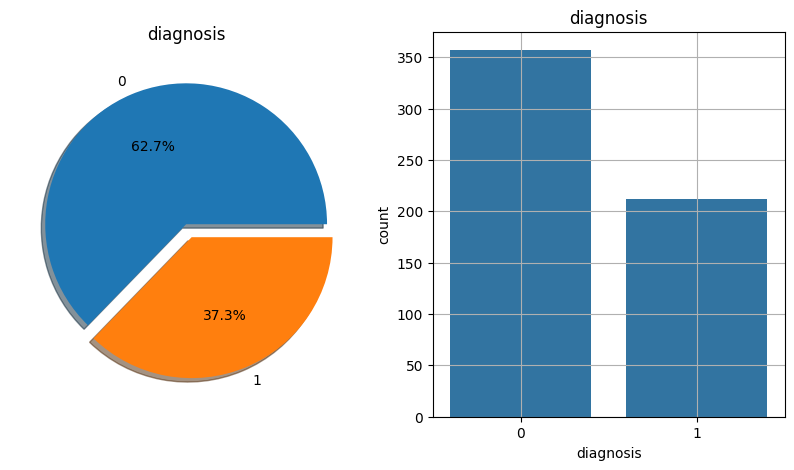

In [25]:
# outcome count plot
f, ax = plt.subplots(1, 2, figsize=(10, 5))
# Pie chart
breast_cancer_dataset['diagnosis'].value_counts().plot.pie(
    explode=[0, 0.1],
    autopct='%1.1f%%',
    ax=ax[0],
    shadow=True
)
ax[0].set_title('diagnosis')
ax[0].set_ylabel('')
# Count plot
sns.countplot(x='diagnosis', data=breast_cancer_dataset, ax=ax[1])
ax[1].set_title('diagnosis')
N, P = breast_cancer_dataset['diagnosis'].value_counts()
print('Negative (0): ', N)
print('Positive (1): ', P)
plt.grid()
plt.show()

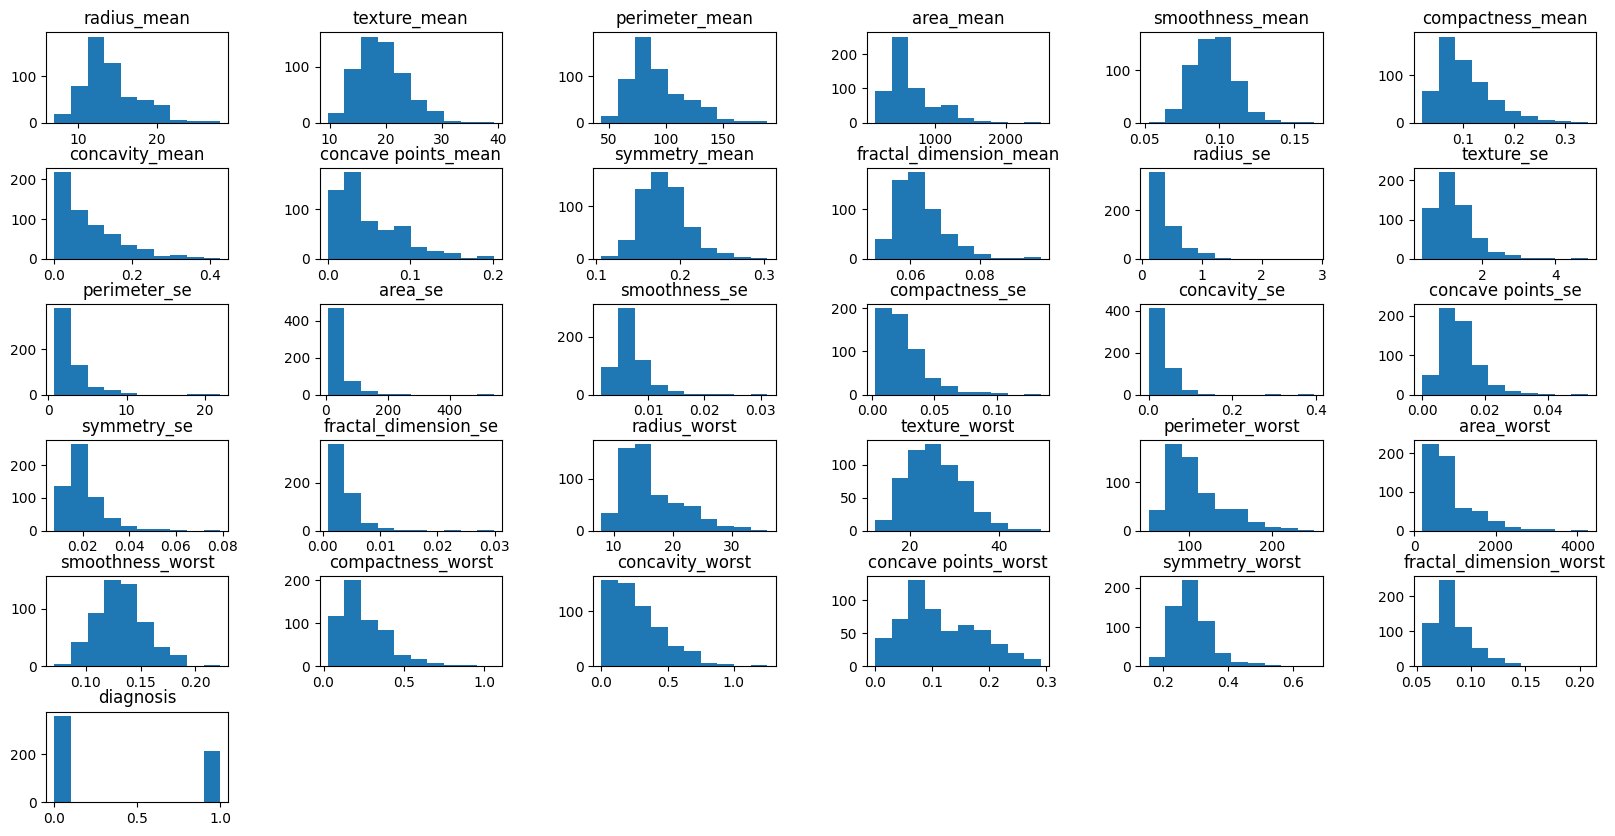

In [26]:
import math
import matplotlib.pyplot as plt

# Menghitung jumlah baris dan kolom yang dibutuhkan
n_cols = len(breast_cancer_dataset.columns)
n_rows = math.ceil(n_cols/6)

# Mengatur ukuran figure
fig, axes = plt.subplots(nrows=n_rows, ncols=6, figsize=(20, 10))

# Mengatur jarak antar subplot
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Menampilkan histogram pada setiap kolom
for i, ax in enumerate(axes.flatten()):
    if i < n_cols:
        ax.hist(breast_cancer_dataset.iloc[:, i], bins=10)
        ax.set_title(breast_cancer_dataset.columns[i])
    else:
        fig.delaxes(ax) # Menghapus subplot yang tersisa

# Menampilkan grafik
plt.show()

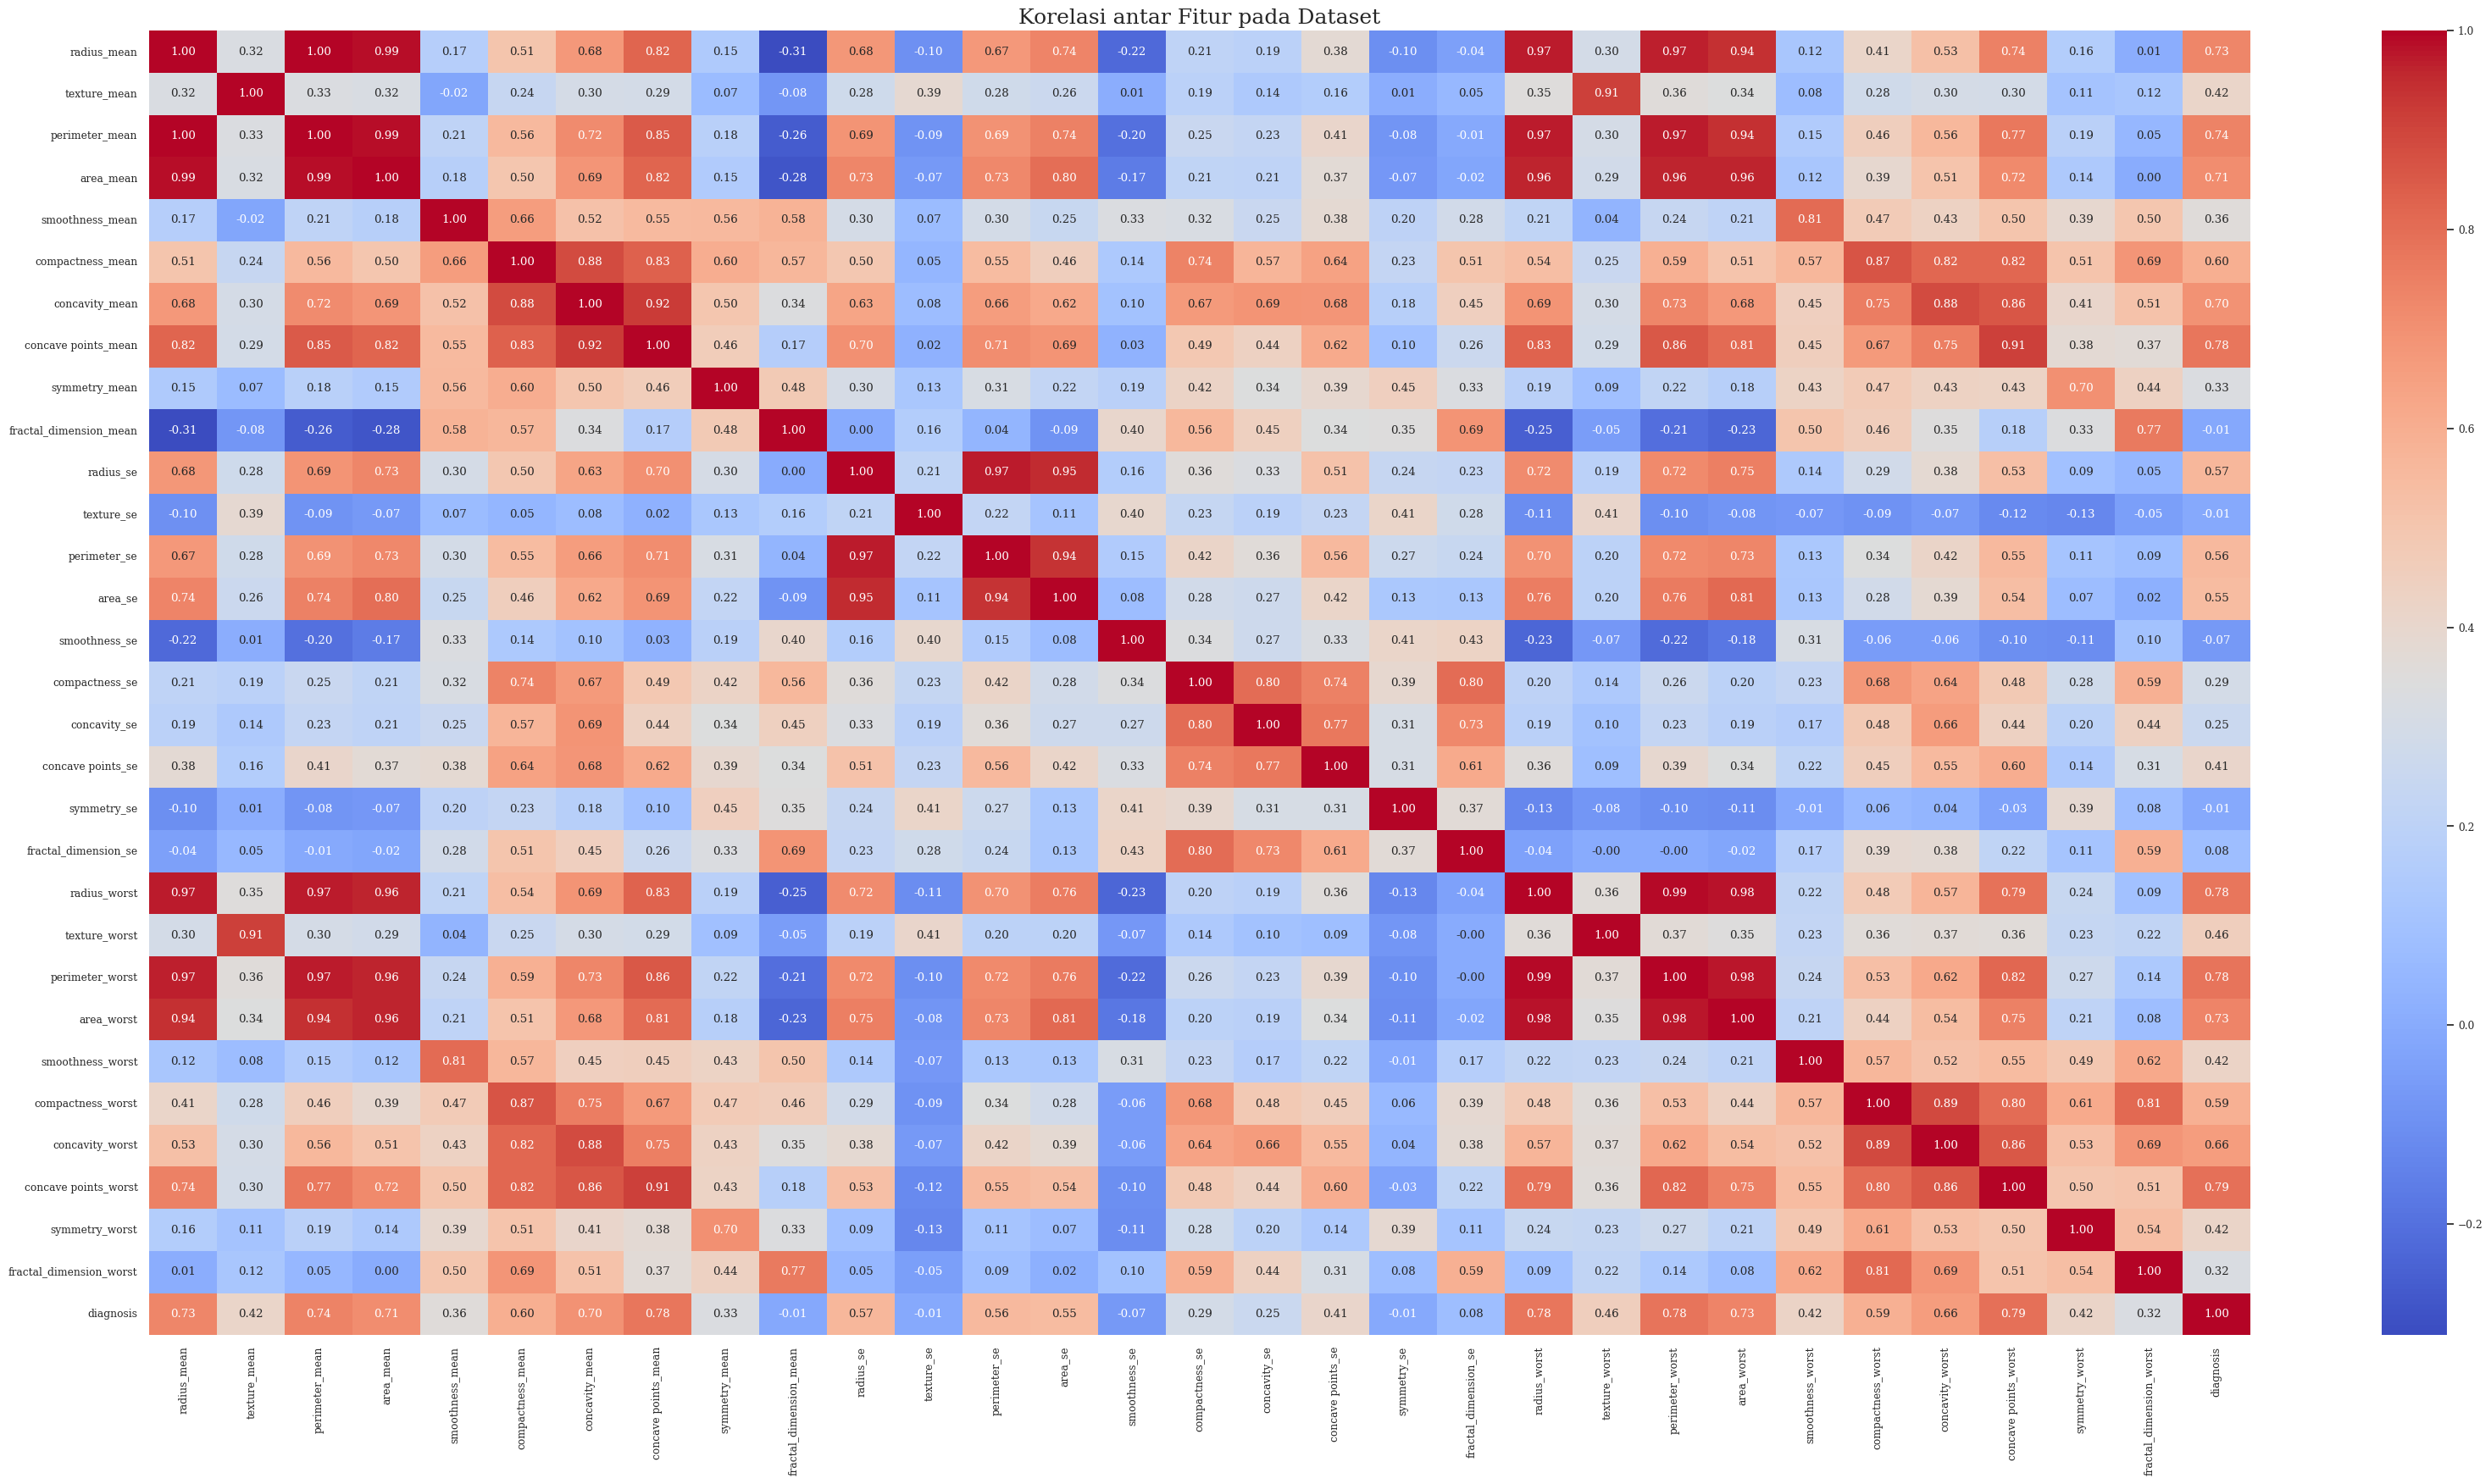

In [27]:
# melihat korelasi antar kolom pada dataset
corr = breast_cancer_dataset.corr()

# memperkecil ukuran heatmap
plt.figure(figsize=(40, 20))

# menyesuaikan ukuran kolom dan baris pada dataset
sns.set(font_scale=0.8)
sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f',
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Korelasi antar Fitur pada Dataset', fontsize=18)
plt.show()

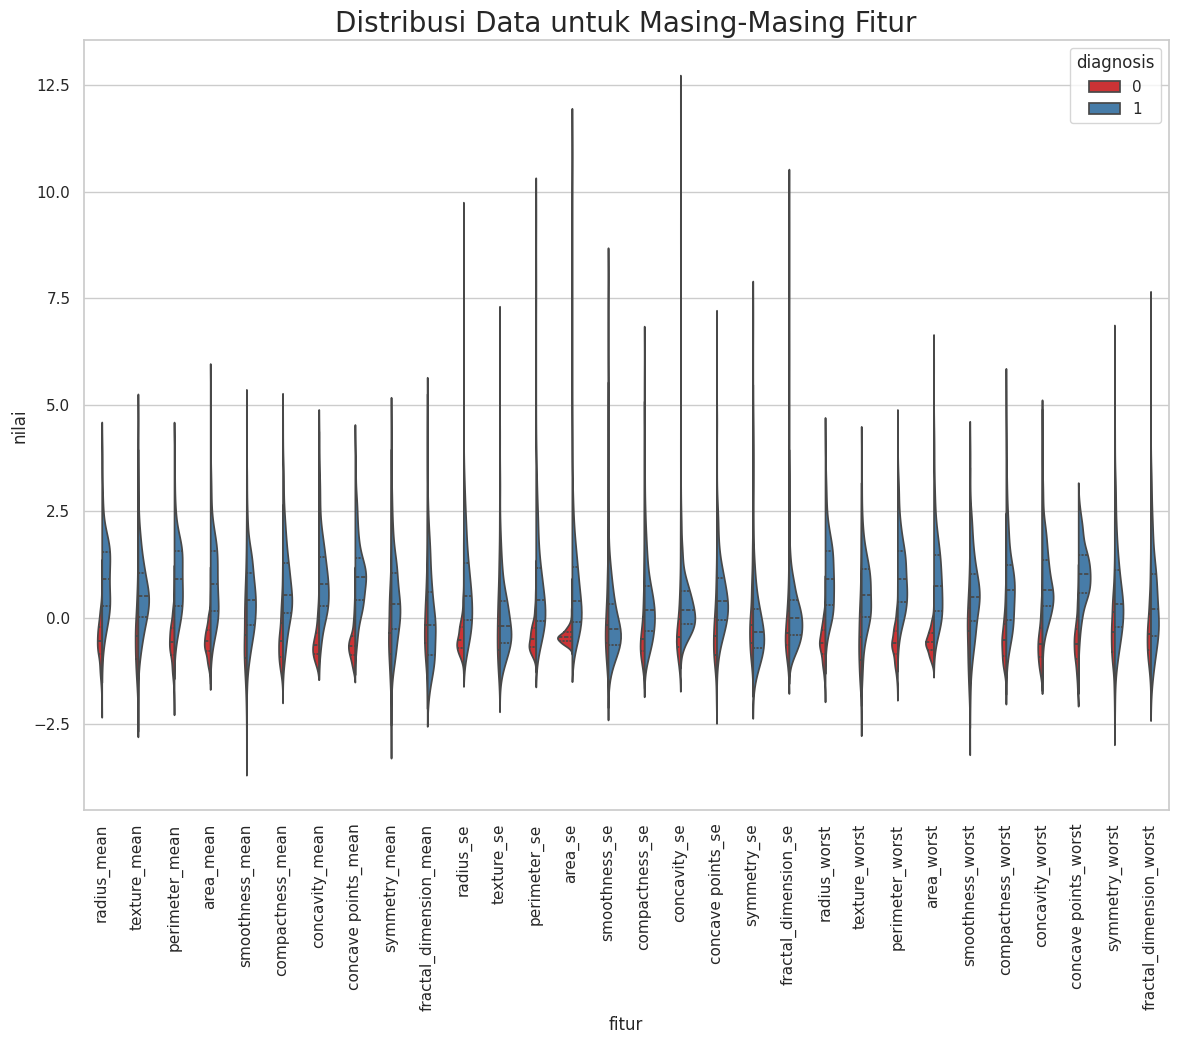

In [28]:
# visualisasi distribusi data untuk masing-masing fitur
sns.set(style='whitegrid', palette='muted')
data_diagnosis = breast_cancer_dataset['diagnosis']
data_features = breast_cancer_dataset.drop(['diagnosis'], axis=1)
data_features_std = (data_features - data_features.mean()) / data_features.std()
data = pd.concat([data_diagnosis, data_features_std], axis=1)
data = pd.melt(data, id_vars='diagnosis',
               var_name='fitur', value_name='nilai')
plt.figure(figsize=(14, 10))
sns.violinplot(x='fitur', y='nilai',
               hue='diagnosis', data=data, split=True,
               inner='quart', palette='Set1')
plt.xticks(rotation=90)
plt.title('Distribusi Data untuk Masing-Masing Fitur', fontsize=20)
plt.show()

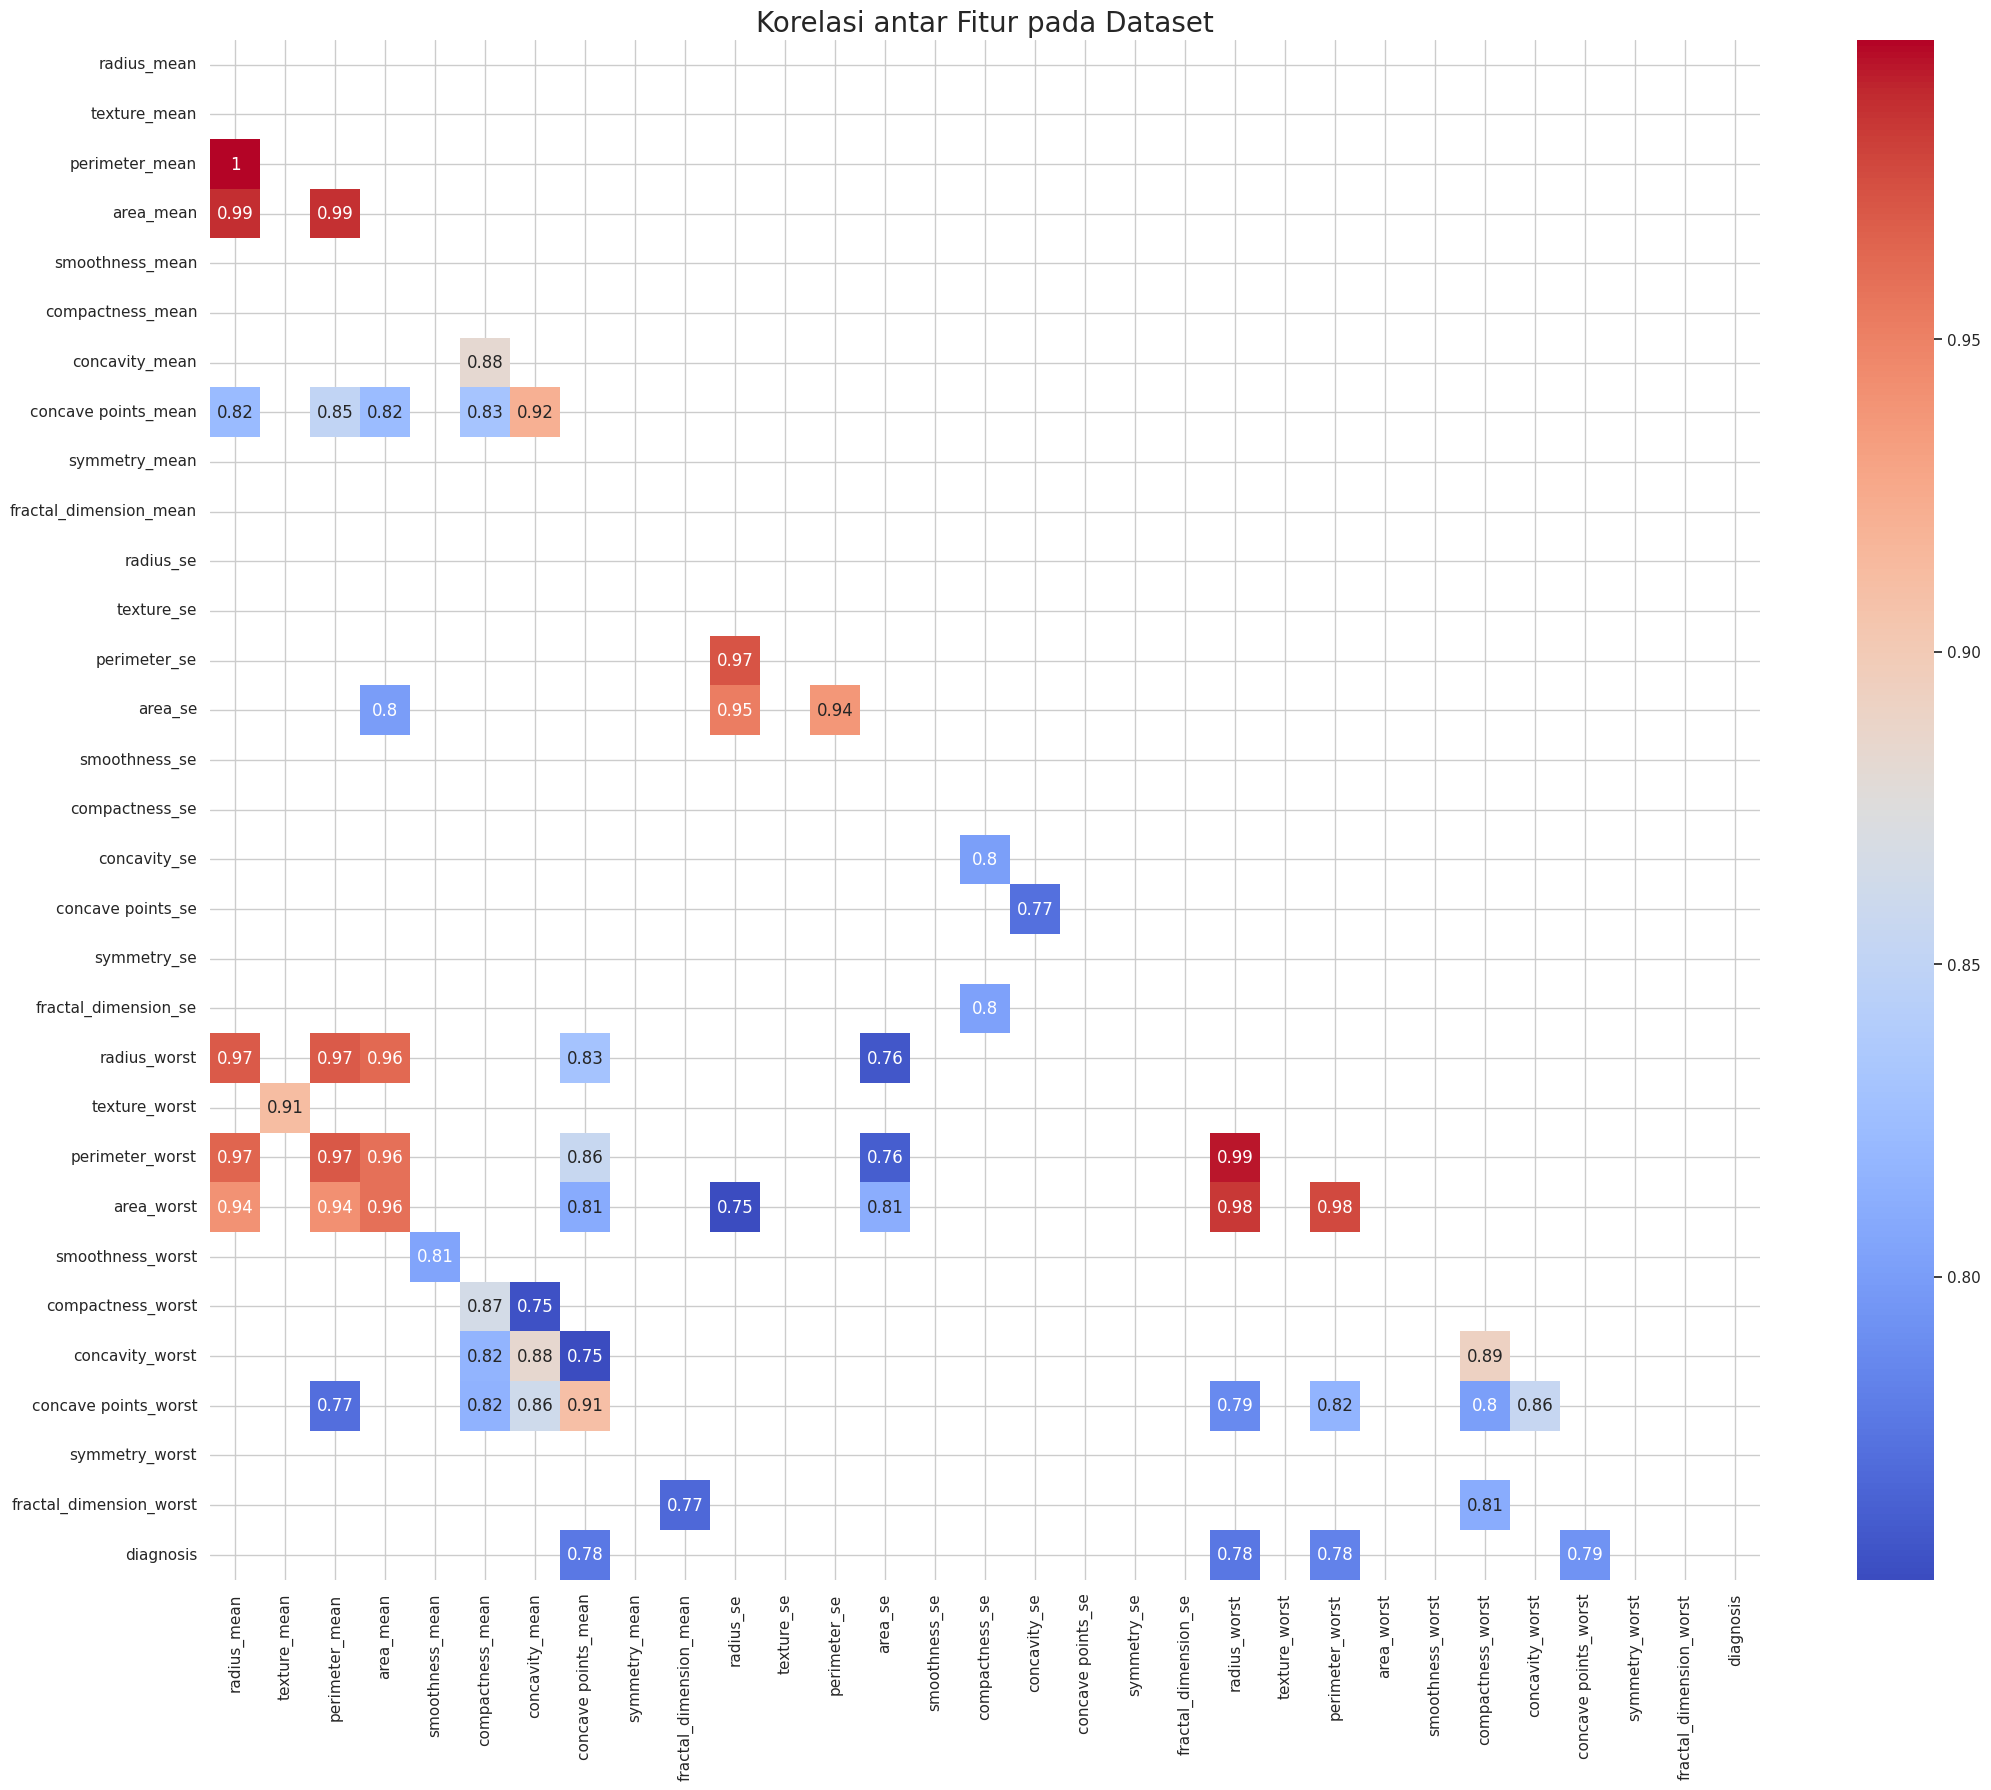

In [29]:
corr = breast_cancer_dataset.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# memperkecil ukuran heatmap
plt.figure(figsize=(25, 20))

sns.heatmap(corr[(corr > 0.75) | (corr < -0.75)], mask=mask, annot=True, cmap='coolwarm')
plt.title('Korelasi antar Fitur pada Dataset', fontsize=20)
plt.show()

In [30]:
# memilih fitur yang memiliki korelasi tinggi dengan data target
threshold = 0.75
relevant_features = corr[abs(corr['diagnosis']) > threshold]['diagnosis']
relevant_features = relevant_features.drop('diagnosis')

# mencetak fitur yang terpilih
print('Fitur yang terpilih:')
print(relevant_features)

# memilih subset data hanya dengan fitur yang terpilih
data_subset = breast_cancer_dataset[relevant_features.index.tolist() + ['diagnosis']]
print('Ukuran data subset:', data_subset.shape)

Fitur yang terpilih:
concave points_mean     0.776614
radius_worst            0.776454
perimeter_worst         0.782914
concave points_worst    0.793566
Name: diagnosis, dtype: float64
Ukuran data subset: (569, 5)


In [31]:
data_subset

,concave points_mean,radius_worst,perimeter_worst,concave points_worst,diagnosis
0,0.14710,25.380,184.60,0.2654,1
1,0.07017,24.990,158.80,0.1860,1
2,0.12790,23.570,152.50,0.2430,1
3,0.10520,14.910,98.87,0.2575,1
4,0.10430,22.540,152.20,0.1625,1
...,...,...,...,...,...
564,0.13890,25.450,166.10,0.2216,1
565,0.09791,23.690,155.00,0.1628,1
566,0.05302,18.980,126.70,0.1418,1
567,0.15200,25.740,184.60,0.2650,1


In [32]:
breast_cancer_dataset = data_subset

In [33]:
breast_cancer_dataset

,concave points_mean,radius_worst,perimeter_worst,concave points_worst,diagnosis
0,0.14710,25.380,184.60,0.2654,1
1,0.07017,24.990,158.80,0.1860,1
2,0.12790,23.570,152.50,0.2430,1
3,0.10520,14.910,98.87,0.2575,1
4,0.10430,22.540,152.20,0.1625,1
...,...,...,...,...,...
564,0.13890,25.450,166.10,0.2216,1
565,0.09791,23.690,155.00,0.1628,1
566,0.05302,18.980,126.70,0.1418,1
567,0.15200,25.740,184.60,0.2650,1


In [34]:
target_name = 'diagnosis'
labels_dataset = breast_cancer_dataset[target_name]
features_dataset = breast_cancer_dataset.drop(target_name, axis=1)

print("Features =\n", features_dataset)
print("labels =\n", labels_dataset)

Features =
      concave points_mean  radius_worst  perimeter_worst  concave points_worst
0                0.14710        25.380           184.60                0.2654
1                0.07017        24.990           158.80                0.1860
2                0.12790        23.570           152.50                0.2430
3                0.10520        14.910            98.87                0.2575
4                0.10430        22.540           152.20                0.1625
..                   ...           ...              ...                   ...
564              0.13890        25.450           166.10                0.2216
565              0.09791        23.690           155.00                0.1628
566              0.05302        18.980           126.70                0.1418
567              0.15200        25.740           184.60                0.2650
568              0.00000         9.456            59.16                0.0000

[569 rows x 4 columns]
labels =
 0      1
1      1


In [35]:
features_dataset.head()

,concave points_mean,radius_worst,perimeter_worst,concave points_worst
0,0.14710,25.38,184.60,0.2654
1,0.07017,24.99,158.80,0.1860
2,0.12790,23.57,152.50,0.2430
3,0.10520,14.91,98.87,0.2575
4,0.10430,22.54,152.20,0.1625


In [36]:
labels_dataset.head()

,diagnosis
0,1
1,1
2,1
3,1
4,1


In [37]:
from sklearn.preprocessing import MinMaxScaler

features_dataset = MinMaxScaler().fit_transform(features_dataset)

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

random_state = 123

train_features, test_features, train_labels, test_labels = train_test_split(
    features_dataset, labels_dataset, train_size=0.8, random_state=random_state
)

svc = SVC()
svc.fit(train_features, train_labels)

train_score_c4 = svc.score(train_features, train_labels)
test_score_c4 = svc.score(test_features, test_labels)

print(f"Classical SVC on the training dataset: {train_score_c4:.2f}")
print(f"Classical SVC on the test dataset:     {test_score_c4:.2f}")

Classical SVC on the training dataset: 0.95
Classical SVC on the test dataset:     0.96


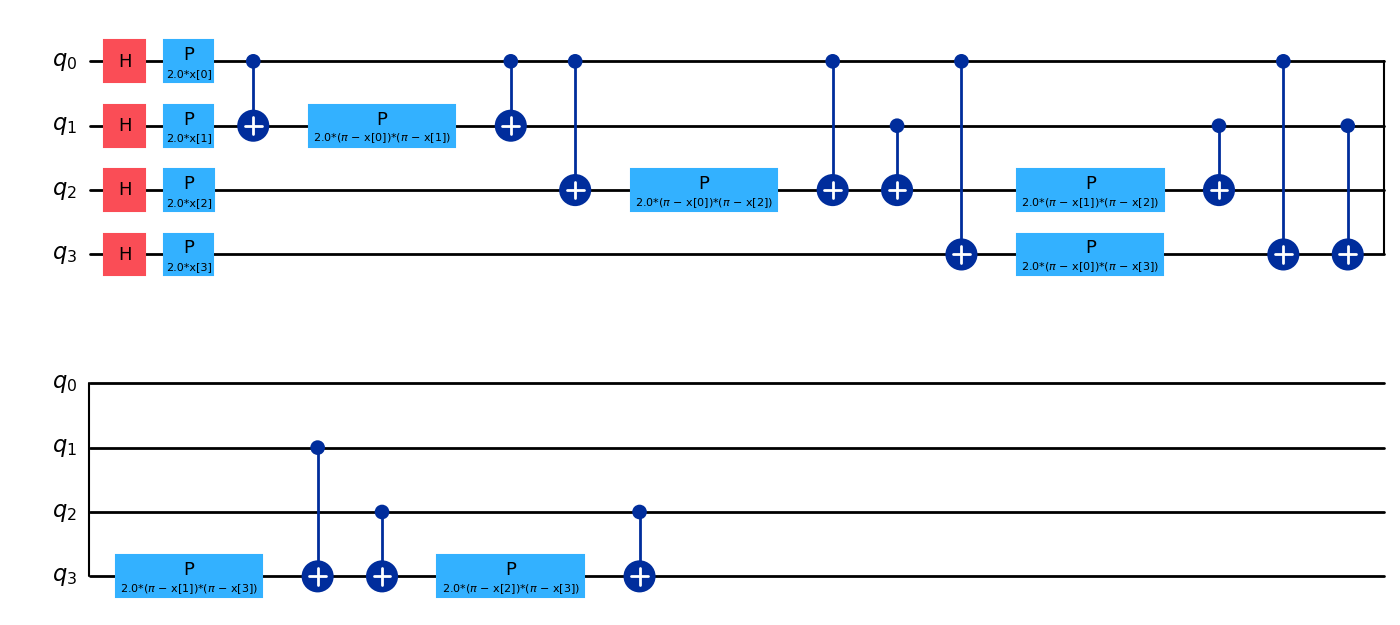

In [42]:
from qiskit.circuit.library import ZZFeatureMap

num_features = features_dataset.shape[1]

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
feature_map.decompose().draw(output="mpl", fold=20)

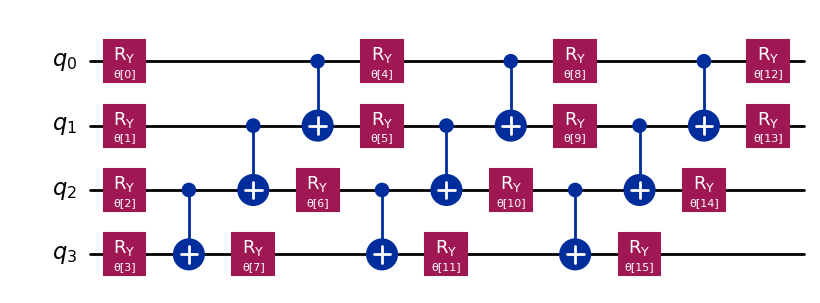

In [43]:
from qiskit.circuit.library import RealAmplitudes

ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
ansatz.decompose().draw(output="mpl", fold=20)

In [63]:
!pip install --upgrade qiskit


  Using cached qiskit-2.1.1-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 53.1 MB/s eta 0:00:00
  Attempting uninstall: qiskit
    Found existing installation: qiskit 1.4.4
    Uninstalling qiskit-1.4.4:
      Successfully uninstalled qiskit-1.4.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
qiskit-machine-learning 0.8.3 requires qiskit<2.0,>=1.0, but you have qiskit 2.1.1 which is incompatible.


In [5]:
from qiskit.optimize import COBYLA
optimizer = COBYLA(maxiter=100)

ModuleNotFoundError: No module named 'qiskit.optimize'